In [126]:
#importing packages
import inline as inline
import matplotlib as matplotlib
#%matplotlib inline
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [127]:
df = pd.read_csv('creditcard.csv')

In [128]:
print('This data frame has {} rows and {} columns.'.format(df.shape[0], df.shape[1]))

This data frame has 284807 rows and 31 columns.


In [129]:
print(df.sample (6))

            Time        V1        V2        V3        V4        V5        V6  \
72390    54688.0  1.142737  0.124997  0.281991  1.203247  0.045383  0.326658   
247448  153579.0 -0.592357  1.241422  0.536660  3.344162 -1.558999  0.905883   
261594  160091.0 -2.228140  2.454174 -2.843007 -1.973992  2.344578  3.107977   
85663    60873.0  1.421991 -1.353711  0.024540 -1.631865 -0.969582  0.422687   
127192   78238.0 -2.608289  2.585261 -2.287855  0.808000 -0.387204  1.030291   
215139  139952.0 -1.331570  0.525677  2.048484 -2.587092 -1.115237 -0.747692   

              V7        V8        V9  ...       V21       V22       V23  \
72390  -0.059143  0.168449  0.095383  ... -0.074241 -0.027592 -0.112634   
247448  0.016188  0.988990 -0.973791  ...  0.189426  0.247550  0.464620   
261594 -0.034037  1.264096  1.324320  ...  0.216480  1.020140  0.080164   
85663  -1.167737  0.043301 -1.566321  ... -0.162124 -0.181773 -0.175620   
127192 -2.229619 -6.206931 -1.031802  ... -0.959505  0.588751  0

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [131]:
#numerical summary -> only non-anonymized columns of interest
#pd.set_option('precision', 3)
df.loc[:, ['Time', 'Amount']].describe()

,Time,Amount
count,284807.000000,284807.000000
mean,94813.859575,88.349619
std,47488.145955,250.120109
min,0.000000,0.000000
25%,54201.500000,5.600000
50%,84692.000000,22.000000
75%,139320.500000,77.165000
max,172792.000000,25691.160000


<AxesSubplot:title={'center':'Distribution of Time Feature'}, xlabel='Time', ylabel='Density'>

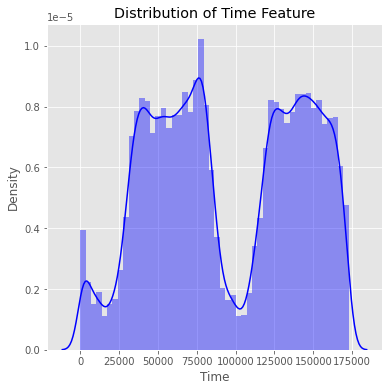

In [132]:
#visualizations of time and amount
plt.figure(figsize=(6,6))
plt.title('Distribution of Time Feature')
sns.distplot(df.Time , color= 'b')

<AxesSubplot:title={'center':'Distribution of Monetary Value Feature'}, xlabel='Amount', ylabel='Density'>

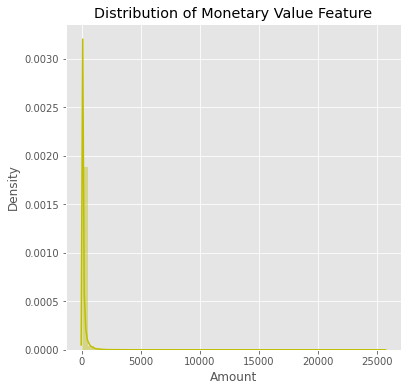

In [133]:
plt.figure(figsize=(6,6))
plt.title('Distribution of Monetary Value Feature')
sns.distplot(df.Amount , color='y')

In [134]:
#fraud vs. normal transactions
counts = df.Class.value_counts()
normal = counts[0]
fraudulent = counts[1]
perc_normal = (normal/(normal+fraudulent))*100
perc_fraudulent = (fraudulent/(normal+fraudulent))*100
print('There were {} non-fraudulent transactions ({:.3f}%) and {} fraudulent transactions ({:.3f}%).'.format(normal, perc_normal, fraudulent, perc_fraudulent))

There were 284315 non-fraudulent transactions (99.827%) and 492 fraudulent transactions (0.173%).


Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

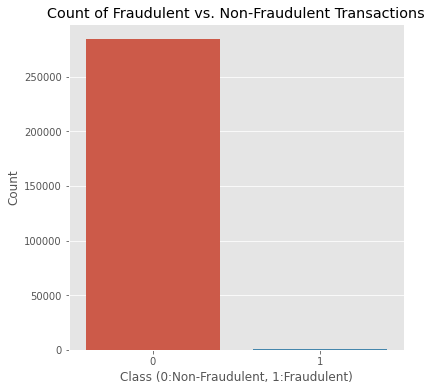

In [135]:
plt.figure(figsize=(6,6))
sns.barplot(x=counts.index, y=counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

In [136]:
corr = df.corr()
corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,...,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,...,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,...,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,...,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,...,1.936953e-16,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246,-0.097733


Text(0.5, 1.0, 'Heatmap of Correlation')

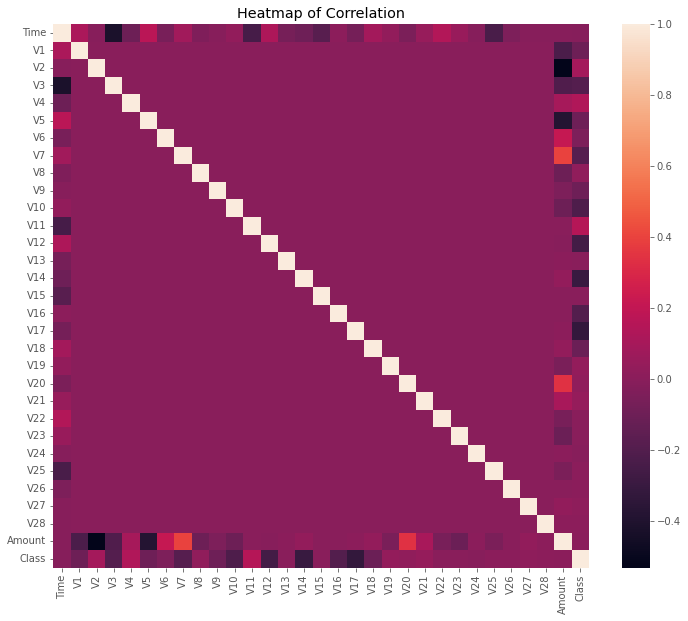

In [137]:
#heatmap
corr = df.corr()
plt.figure(figsize=(12,10))
heat = sns.heatmap(data=corr)
plt.title('Heatmap of Correlation')

In [138]:
#skewness
skew_ = df.skew()
skew_

Time      -0.035568
V1        -3.280667
V2        -4.624866
V3        -2.240155
V4         0.676292
V5        -2.425901
V6         1.826581
V7         2.553907
V8        -8.521944
V9         0.554680
V10        1.187141
V11        0.356506
V12       -2.278401
V13        0.065233
V14       -1.995176
V15       -0.308423
V16       -1.100966
V17       -3.844914
V18       -0.259880
V19        0.109192
V20       -2.037155
V21        3.592991
V22       -0.213258
V23       -5.875140
V24       -0.552499
V25       -0.415793
V26        0.576693
V27       -1.170209
V28       11.192091
Amount    16.977724
Class     23.997579
dtype: float64

In [139]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler2 = StandardScaler()
#scaling time
scaled_time = scaler.fit_transform(df[['Time']])
flat_list1 = [item for sublist in scaled_time.tolist() for item in sublist]
scaled_time = pd.Series(flat_list1)

In [140]:
#scaling the amount column
scaled_amount = scaler2.fit_transform(df[['Amount']])
flat_list2 = [item for sublist in scaled_amount.tolist() for item in sublist]
scaled_amount = pd.Series(flat_list2)

In [141]:
#concatenating newly created columns w original df
df = pd.concat([df, scaled_amount.rename('scaled_amount'), scaled_time.rename('scaled_time')], axis=1)
df.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,scaled_amount,scaled_time
82926,59613.0,1.165380,-0.157373,0.650826,1.392757,0.038432,1.415719,-0.496220,0.322869,1.219171,...,-0.105211,-1.310117,0.638167,-0.425881,0.093767,0.017450,17.54,0,-0.283103,-0.741257
202792,134494.0,2.068710,0.141885,-1.732656,0.396692,0.472567,-0.761342,0.168010,-0.204563,0.503036,...,0.338516,0.421323,-0.266627,0.180689,-0.060057,-0.031573,2.69,0,-0.342475,0.835581
61467,49853.0,1.162595,-0.259409,0.578097,-0.048638,-0.699311,-0.348902,-0.399196,0.028102,0.182803,...,-0.110800,0.095059,0.239207,1.068491,-0.071815,0.004733,47.85,0,-0.161921,-0.946782
211639,138495.0,2.042043,-0.190761,-1.200997,0.236128,-0.031937,-0.733628,-0.003492,-0.102211,0.477294,...,0.302463,-0.367385,-0.324424,0.202186,-0.082365,-0.075904,1.29,0,-0.348072,0.919834
187568,127588.0,1.907792,-0.657082,-0.355492,0.347938,-0.758211,-0.108447,-0.772792,0.142011,1.139473,...,0.095243,-0.296785,-0.305901,0.568128,-0.033992,-0.056431,39.99,0,-0.193346,0.690155


In [142]:
#dropping old amount and time columns
df.drop(['Amount', 'Time'], axis=1, inplace=True)

In [143]:
#manual train test split using numpy's random.rand
mask = np.random.rand(len(df)) < 0.9
train = df[mask]
test = df[~mask]
print('Train Shape: {}\nTest Shape: {}'.format(train.shape, test.shape))

Train Shape: (256506, 31)
Test Shape: (28301, 31)


In [144]:
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

In [145]:
#how many random samples from normal transactions do we need?
no_of_frauds = train.Class.value_counts()[1]
print('There are {} fraudulent transactions in the train data.'.format(no_of_frauds))

There are 451 fraudulent transactions in the train data.


In [146]:
#randomly selecting 442 random non-fraudulent transactions
non_fraud = train[train['Class'] == 0]
fraud = train[train['Class'] == 1]

In [147]:
selected = non_fraud.sample(no_of_frauds)
selected.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
73195,-0.569183,-3.770582,0.011037,1.584470,-1.819599,1.720690,0.053681,0.153600,0.321410,-0.055657,...,-1.487002,-0.851271,-0.898273,0.133905,-0.416091,-0.046611,0.190211,0,3.448951,-0.758061
147172,-0.534472,0.593989,-2.399163,-2.121966,3.528378,2.739495,1.176119,0.574551,-0.349395,-0.167216,...,0.763348,-0.183496,0.761831,-0.216167,0.118032,0.591507,0.292073,0,-0.033382,0.443778
239554,-1.296829,1.920595,-1.641731,-1.412400,0.772385,-1.188054,1.129672,0.247084,0.055151,0.718227,...,0.813670,-0.120620,0.776368,-0.127595,0.055742,0.676912,0.451427,0,-0.322444,1.418170
184884,0.083060,0.993025,-0.330925,-0.637560,0.956486,-0.490678,0.882855,0.039971,-0.353825,-0.682631,...,-0.657085,0.106318,0.607465,-0.473560,0.091475,0.222769,0.075513,0,-0.333279,0.859314
73806,1.081948,-0.490299,1.237408,0.222037,-1.248101,-0.176620,-0.719964,0.154939,1.075449,-0.447122,...,0.002545,0.099749,0.475516,-0.020627,0.996443,-0.024423,0.022231,0,-0.176434,-0.751449


In [148]:
#concatenating both into a subsample data set with equal class distribution
selected.reset_index(drop=True, inplace=True)
fraud.reset_index(drop=True, inplace=True)

In [149]:
subsample = pd.concat([selected, fraud])
len(subsample)

902

In [150]:
#shuffling our data set
subsample = subsample.sample(frac=1).reset_index(drop=True)
subsample.head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,1.074138,-0.248274,1.201476,1.737137,-0.815580,0.565713,-0.606182,0.346409,1.422385,-0.384469,...,-0.812010,0.095573,0.038027,0.386237,-0.505616,0.083571,0.026620,0,-0.301334,-1.221630
1,-3.975939,-1.244939,-3.707414,4.544772,4.050676,-3.407679,-5.063118,1.007042,-3.190158,-4.250717,...,-0.037395,0.348707,-0.162929,0.410531,-0.123612,0.877424,0.667568,1,-0.320045,0.932932
2,-5.256434,0.364541,-5.412085,2.400031,0.697301,-1.998755,-5.835532,-0.887739,-2.828287,-4.614508,...,0.511285,-1.110045,0.178987,0.220235,-0.699809,0.580487,-0.173630,1,-0.317646,1.023923
3,-2.349340,1.512604,-2.647497,1.753792,0.406328,-2.188494,-0.686935,-0.547984,-0.099528,-1.672346,...,-0.595178,0.258148,0.061901,-0.354180,-1.152671,-0.736073,0.733703,1,-0.333639,1.373401
4,1.259949,-1.513881,0.735446,-1.201266,-2.037871,-0.715964,-1.174867,-0.137205,-1.505237,1.372590,...,0.334513,-0.134981,0.398670,0.317231,-0.059333,0.031149,0.048079,0,0.180555,-0.851748
5,-0.675347,0.491543,-0.299686,-0.369913,1.520477,-0.806435,0.497727,-0.953603,-0.313002,-0.286351,...,1.102473,-0.562217,-0.392714,0.004094,0.050388,0.291512,0.146681,0,-0.313249,0.885173
6,-1.927453,1.827621,-7.019495,5.348303,-2.739188,-2.107219,-5.015848,1.205868,-4.382713,-8.337707,...,-0.792017,-0.771414,-0.379574,0.718717,1.111151,1.277707,0.819081,1,1.694790,-0.223422
7,1.240578,-0.080043,0.371009,-0.019037,-0.666651,-0.920697,-0.151021,-0.073962,0.391681,-0.188244,...,0.174440,0.038284,0.453183,0.224791,1.116286,-0.076558,-0.002967,0,-0.350191,-1.283246
8,2.118938,0.180312,-1.943492,0.538548,0.530091,-1.466099,0.776539,-0.584241,0.046463,0.176115,...,0.548135,-0.066530,-0.017531,0.458484,0.536833,-0.095280,-0.081986,0,-0.339436,0.915054
9,-2.783865,1.596824,-2.084844,2.512986,-1.446749,-0.828496,-0.732262,-0.203329,-0.347046,-2.162061,...,0.293268,0.199568,0.146868,0.163602,-0.624085,-1.333100,0.428634,1,0.270472,1.377802


Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

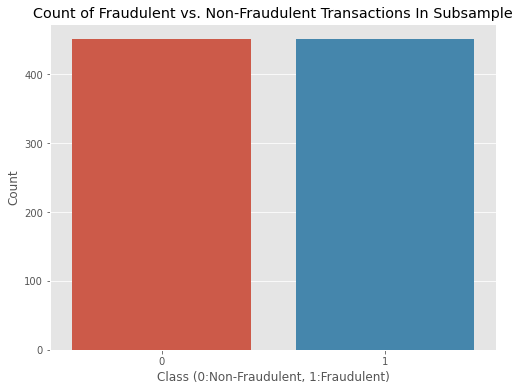

In [151]:
new_counts = subsample.Class.value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=new_counts.index, y=new_counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions In Subsample')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

In [152]:
#taking a look at correlations once more
corr = subsample.corr()
corr = corr[['Class']]
corr

,Class
V1,-0.444912
V2,0.479881
V3,-0.570722
V4,0.709551
V5,-0.377591
V6,-0.405485
V7,-0.474569
V8,0.057151
V9,-0.553598
V10,-0.620619


In [153]:
#negative correlations smaller than -0.5
corr[corr.Class < -0.5]

,Class
V3,-0.570722
V9,-0.553598
V10,-0.620619
V12,-0.682959
V14,-0.745919
V16,-0.593070
V17,-0.555253


In [154]:
#positive correlations greater than 0.5
corr[corr.Class > 0.5]

,Class
V4,0.709551
V11,0.678989
Class,1.000000


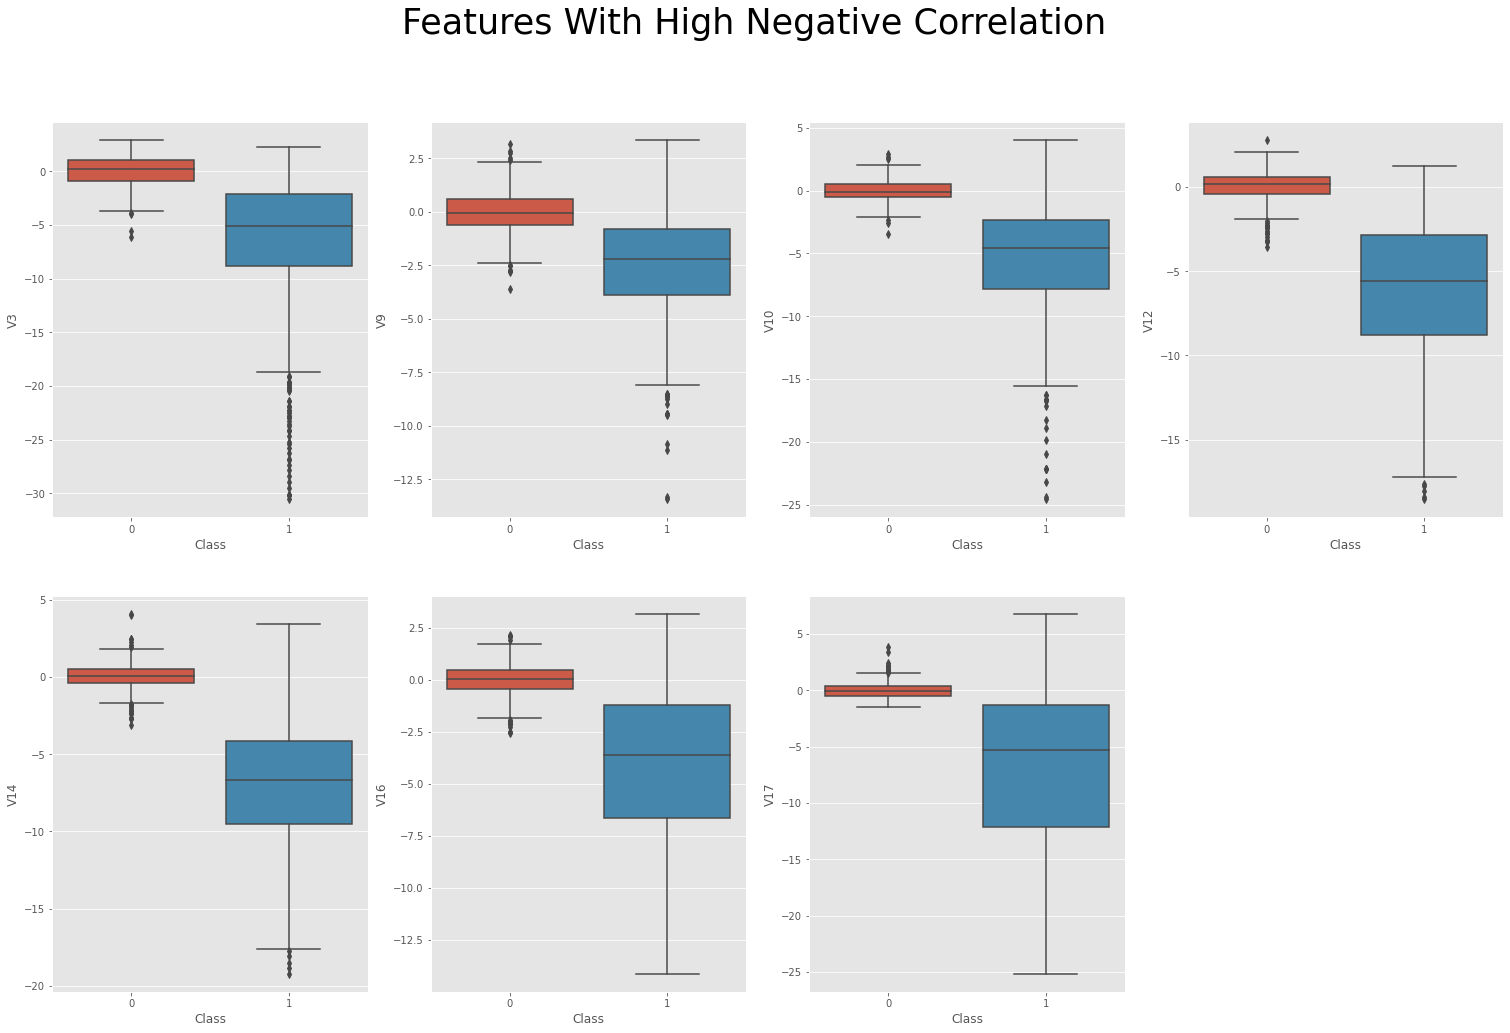

In [155]:
#visualizing the features w high negative correlation
f, axes = plt.subplots(nrows=2, ncols=4, figsize=(26,16))

f.suptitle('Features With High Negative Correlation', size=35)
sns.boxplot(x="Class", y="V3", data=subsample, ax=axes[0,0])
sns.boxplot(x="Class", y="V9", data=subsample, ax=axes[0,1])
sns.boxplot(x="Class", y="V10", data=subsample, ax=axes[0,2])
sns.boxplot(x="Class", y="V12", data=subsample, ax=axes[0,3])
sns.boxplot(x="Class", y="V14", data=subsample, ax=axes[1,0])
sns.boxplot(x="Class", y="V16", data=subsample, ax=axes[1,1])
sns.boxplot(x="Class", y="V17", data=subsample, ax=axes[1,2])
f.delaxes(axes[1,3])

<AxesSubplot:xlabel='Class', ylabel='V11'>

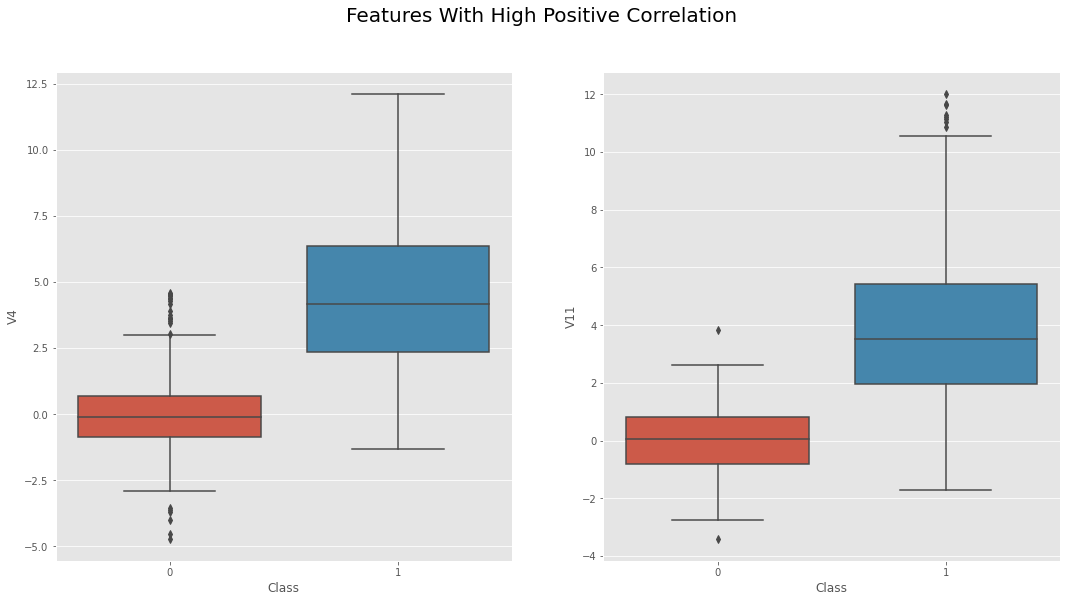

In [156]:
#visualizing the features w high positive correlation
f, axes = plt.subplots(nrows=1, ncols=2, figsize=(18,9))

f.suptitle('Features With High Positive Correlation', size=20)
sns.boxplot(x="Class", y="V4", data=subsample, ax=axes[0])
sns.boxplot(x="Class", y="V11", data=subsample, ax=axes[1])

In [157]:
#Only removing extreme outliers
Q1 = subsample.quantile(0.25)
Q3 = subsample.quantile(0.75)
IQR = Q3 - Q1

df2 = subsample[~((subsample < (Q1 - 2.5 * IQR)) |(subsample > (Q3 + 2.5 * IQR))).any(axis=1)]

In [158]:
len_after = len(df2)
len_before = len(subsample)
len_difference = len(subsample) - len(df2)
print('We reduced our data size from {} transactions by {} transactions to {} transactions.'.format(len_before, len_difference, len_after))

We reduced our data size from 902 transactions by 259 transactions to 643 transactions.


In [159]:
from sklearn.manifold import TSNE

X = df2.drop('Class', axis=1)
y = df2['Class']

In [160]:
#t-SNE
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)

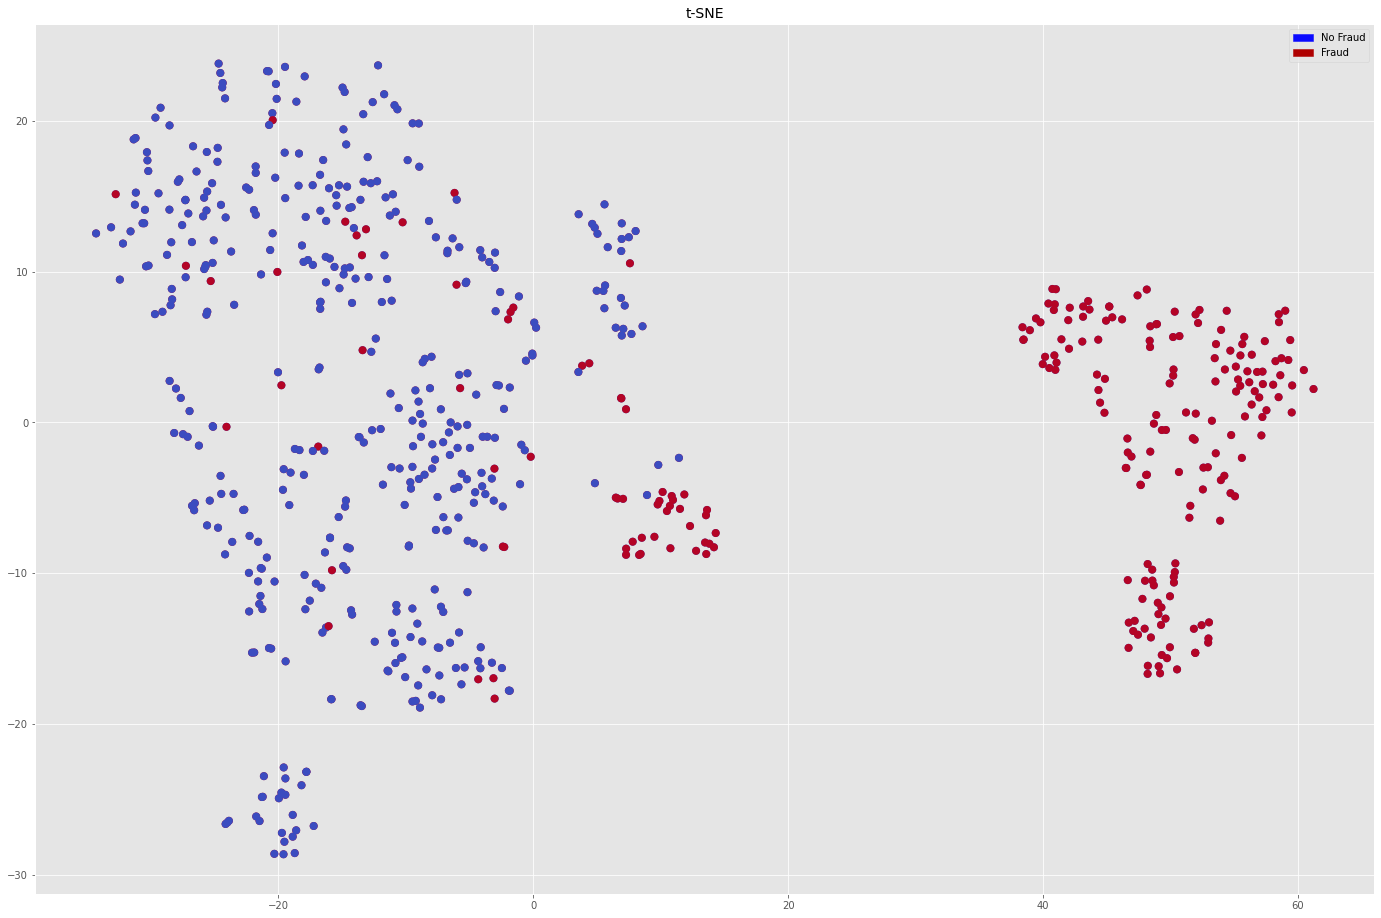

In [161]:
# t-SNE scatter plot
import matplotlib.patches as mpatches

f, ax = plt.subplots(figsize=(24,16))


blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax.set_title('t-SNE', fontsize=14)

ax.grid(True)

ax.legend(handles=[blue_patch, red_patch])

In [162]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [163]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [164]:
X_train = X_train.values
X_validation = X_test.values
y_train = y_train.values
y_validation = y_test.values

In [165]:
print('X_shapes:\n', 'X_train:', 'X_validation:\n', X_train.shape, X_validation.shape, '\n')
print('Y_shapes:\n', 'Y_train:', 'Y_validation:\n', y_train.shape, y_validation.shape)

X_shapes:
 X_train: X_validation:
 (514, 30) (129, 30) 

Y_shapes:
 Y_train: Y_validation:
 (514,) (129,)


In [166]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

In [167]:
##Spot-Checking Algorithms

models = []

models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
models.append(('XGB', XGBClassifier()))
models.append(('RF', RandomForestClassifier()))

#testing models

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=42, shuffle= True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.974709 (0.019875)
LDA: 0.975156 (0.021629)
KNN: 0.952157 (0.033858)
CART: 0.894081 (0.047334)
SVM: 0.974347 (0.021301)
XGB: 0.971369 (0.029278)
RF: 0.968217 (0.026222)


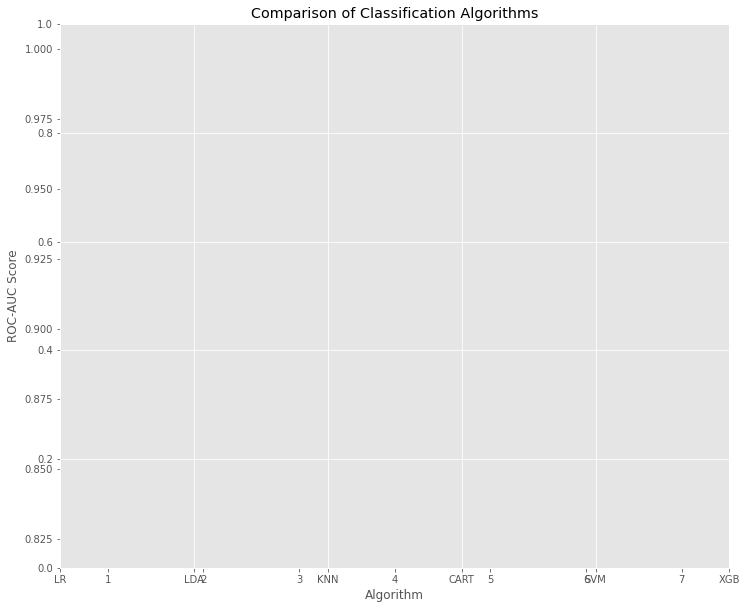

In [168]:
#Compare Algorithms

fig = plt.figure(figsize=(12,10))
plt.title('Comparison of Classification Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('ROC-AUC Score')
plt.boxplot(results)
ax = fig.add_subplot(111)
ax.set_xticklabels(names)
plt.show()

In [169]:
#visualizing RF
model = RandomForestClassifier(n_estimators=10)

# Train
model.fit(X_train, y_train)
# Extract single tree
estimator = model.estimators_[5]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot',
                feature_names = X.columns.tolist(),
                class_names = ['0',' 1'],
                rounded = True, proportion = False,
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

FileNotFoundError: [WinError 2] The system cannot find the file specified